# Supermarket (KMeans Clustering Algorithm)

<img src="https://madelinecoyne.files.wordpress.com/2015/03/cashier.jpg" width="650">

### You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [3]:
df=pd.read_csv('Mall_Customers.csv')

# Data Preparation and Cleaning

## Quick peek inside the dataset

In [4]:
#the first `5` rows
df.head()  

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#the last `5` rows
df.tail()   

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
print("The shape of the dataset:",df.shape)

The shape of the dataset: (200, 5)


## Names of columns

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
#Alter axes labels
df.rename(columns={'Spending Score (1-100)':'Sp_Score','Annual Income (k$)':'An_Income'},inplace=True)

In [9]:
df.head()

,CustomerID,Gender,Age,An_Income,Sp_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Checking for `null`

In [10]:
#Detect missing values
df.isnull().sum()   

CustomerID    0
Gender        0
Age           0
An_Income     0
Sp_Score      0
dtype: int64

# Exploratory Analysis and Visualization

In [11]:
# Gender wise Customers viualizations 
df.Gender.value_counts()/len(df)*100

Female    56.0
Male      44.0
Name: Gender, dtype: float64

In [12]:
# Between annual income and sp_score
df['Sp_Score'].corr(df['An_Income'])

0.009902848094037608

In [13]:
# Between Gender and Sp score
df['Age'].corr(df['Sp_Score'])

-0.32722684603909

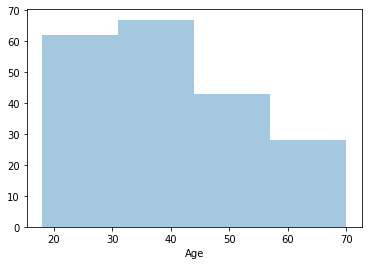

In [14]:
# On Age basis
sns.distplot(df['Age'],kde=False,bins=4)

In [15]:
Age_30=0
Age_50=0
Age_70=0
for i in range(0,len(df)):
    if df.Age[i]<=30:
        Age_30+=1
    if df.Age[i]<=50:
        Age_50+=1
    if df.Age[i]<=70:
        Age_70+=1
print('Percentile of Customers Below Age 30 are ',Age_30/len(df)*100)
print('Percentile of Customers Betwn 30 to 50 Age are ',(Age_50-Age_30)/len(df)*100)
print('Percentile of Customers Betwn 50 to 70 Age are ',(Age_70-Age_50)/len(df)*100)

Percentile of Customers Below Age 30 are  31.0
Percentile of Customers Betwn 30 to 50 Age are  49.0
Percentile of Customers Betwn 50 to 70 Age are  20.0


## So we can find more customers in Age group of `30 to 50`

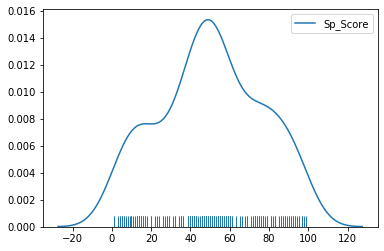

In [16]:
sns.kdeplot(df['Sp_Score'])
sns.rugplot(df['Sp_Score'])

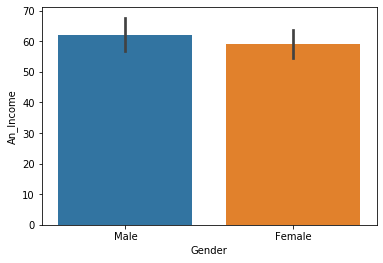

In [17]:
sns.barplot(x='Gender',y='An_Income',data=df)

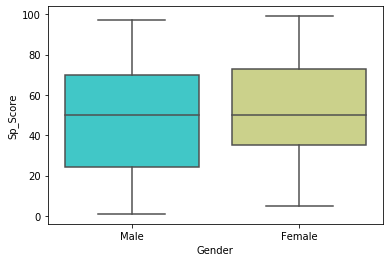

In [18]:
sns.boxplot(x='Gender',y='Sp_Score',palette='rainbow',data=df)

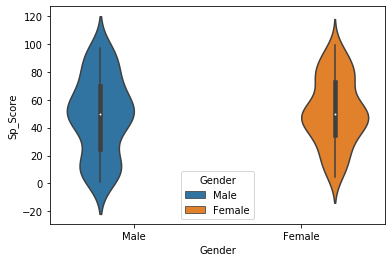

In [19]:
sns.violinplot(x='Gender',y='Sp_Score',patette='rainbow',data=df,hue='Gender')

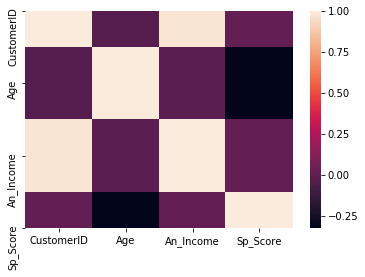

In [20]:
sns.heatmap(df.corr())

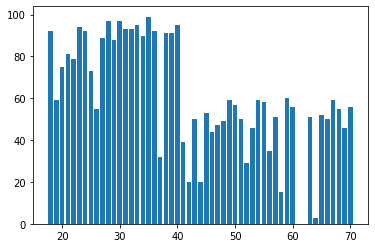

In [21]:
plt.bar(df['Age'],df['Sp_Score'])
plt.show()

## So the correlation between variable is `Intermediate`

# Clustering analysis 

In [22]:
import sklearn.cluster as cluster

In [23]:
x = df.iloc[:, [3, 4]].values

# let's check the shape of x
print('The shape of x is ',x.shape)

The shape of x is  (200, 2)


In [24]:
#Using KMeans for clustering
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

## The Elbow Method
The Elbow method is a method of interpretation and validation of consistency within-cluster analysis designed to help to find the appropriate number of clusters in a dataset.

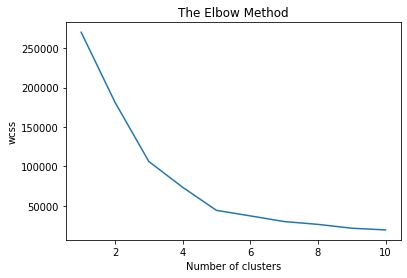

In [25]:
#Plotting Number of Clusters Vs wcss - The Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [26]:
#Taking number of clusters = 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(x)

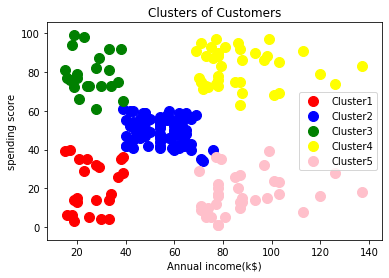

In [27]:
# PLotting the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster5')
plt.title('Clusters of Customers')
plt.xlabel('Annual income(k$)')
plt.ylabel('spending score')
plt.legend()
plt.show()


# The alternate method

In [28]:
import sklearn.cluster as cluster

In [29]:
kmeans=cluster.KMeans(n_clusters=5,init='k-means++')
kmeans=kmeans.fit(df[['Sp_Score','An_Income']])

In [30]:
kmeans.cluster_centers_

array([[20.91304348, 26.30434783],
       [79.36363636, 25.72727273],
       [17.11428571, 88.2       ],
       [49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154]])

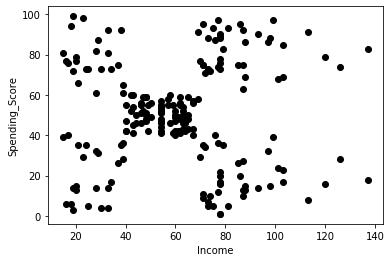

In [31]:
X = df[["An_Income","Sp_Score"]]
#Visualise data points
plt.scatter(X["An_Income"],X["Sp_Score"],c='black')
plt.xlabel('Income')
plt.ylabel('Spending_Score')
plt.show()

In [32]:
df['Clusters']=kmeans.labels_
df.head()

,CustomerID,Gender,Age,An_Income,Sp_Score,Clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0


In [33]:
kmeans.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3,
       0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 4, 3, 4, 2, 4, 2, 4,
       3, 4, 2, 4, 2, 4, 2, 4, 2, 4, 3, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [34]:
df['Clusters'].value_counts()

3    81
4    39
2    35
0    23
1    22
Name: Clusters, dtype: int64

In [35]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=5)
kmean.fit(X)

KMeans(n_clusters=5)

In [36]:
kmean.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

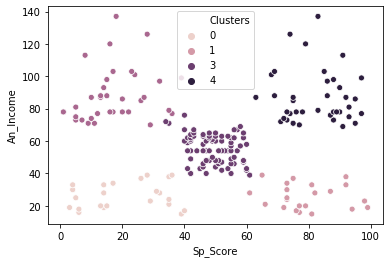

In [37]:
sns.scatterplot(x=df.Sp_Score,y=df.An_Income,hue=df.Clusters)

In [38]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data_scaled = scale.fit_transform(X)
data_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

Text(0, 0.5, 'Inertia')

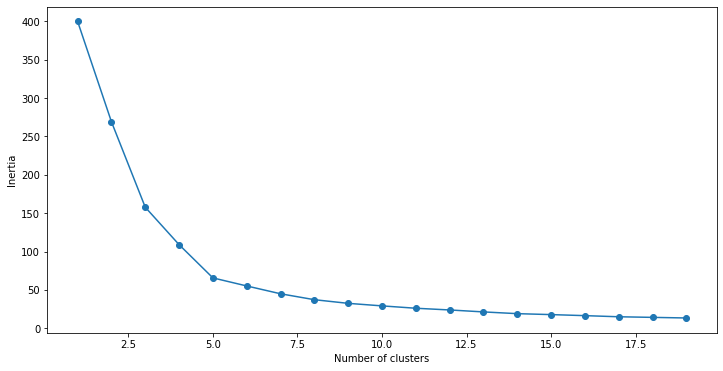

In [39]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [40]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(data_scaled)

KMeans(n_clusters=5)

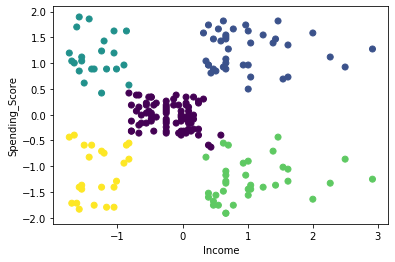

In [41]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans.labels_)
plt.xlabel('Income')
plt.ylabel('Spending_Score')
plt.show()

In [42]:
# Running the clustering algorithm on the data set
y_km= kmeans.fit_predict(data_scaled)
print(y_km)
print('Distortion: %.2f' % kmeans.inertia_)

[2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 4 2 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 0 3 0 4 0 3 0 3 0 4 0 3 0 3 0 3 0 3 0 4 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]
Distortion: 65.57


In [43]:
result = pd.DataFrame(X,columns= ["An_Income","Sp_Score"])

In [44]:
result.head()

,An_Income,Sp_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [45]:
# Taking out only the Predictor variables
df=df.iloc[:,0:4]
X=df.values
print(X[0:4])

[[1 'Male' 19 15]
 [2 'Male' 21 15]
 [3 'Female' 20 16]
 [4 'Female' 23 16]]


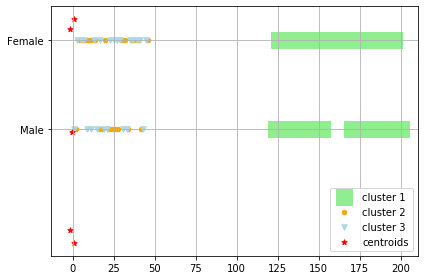

In [46]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=250,
            c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=20,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=30,
            c='lightblue',
            marker='v',
            label='cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=30,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()